In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
file_path = r"C:\Users\AHMAD\Desktop\Data Science Project\same\Production_Data.xlsx"

In [3]:
sheet_name= 'vw_ChurnData'

In [4]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11510-KER  Female   46      No       Kerala                   10   
1   11535-WES    Male   43      No  West Bengal                    5   
2   11540-DEL    Male   63     Yes        Delhi                   15   
3   11540-MAH  Female   50     Yes  Maharashtra                    6   
4   11543-WES  Female   35     Yes  West Bengal                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 4        NaN           Yes             No  ...   
1                23     Deal 2            No             No  ...   
2                15     Deal 2           Yes            Yes  ...   
3                20     Deal 2            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          95.90        827.45           0.0   
1  Bank Withdrawal          

In [6]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [9]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[793  51]
 [147 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       844
           1       0.81      0.59      0.68       358

    accuracy                           0.84      1202
   macro avg       0.82      0.76      0.78      1202
weighted avg       0.83      0.84      0.83      1202



In [10]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

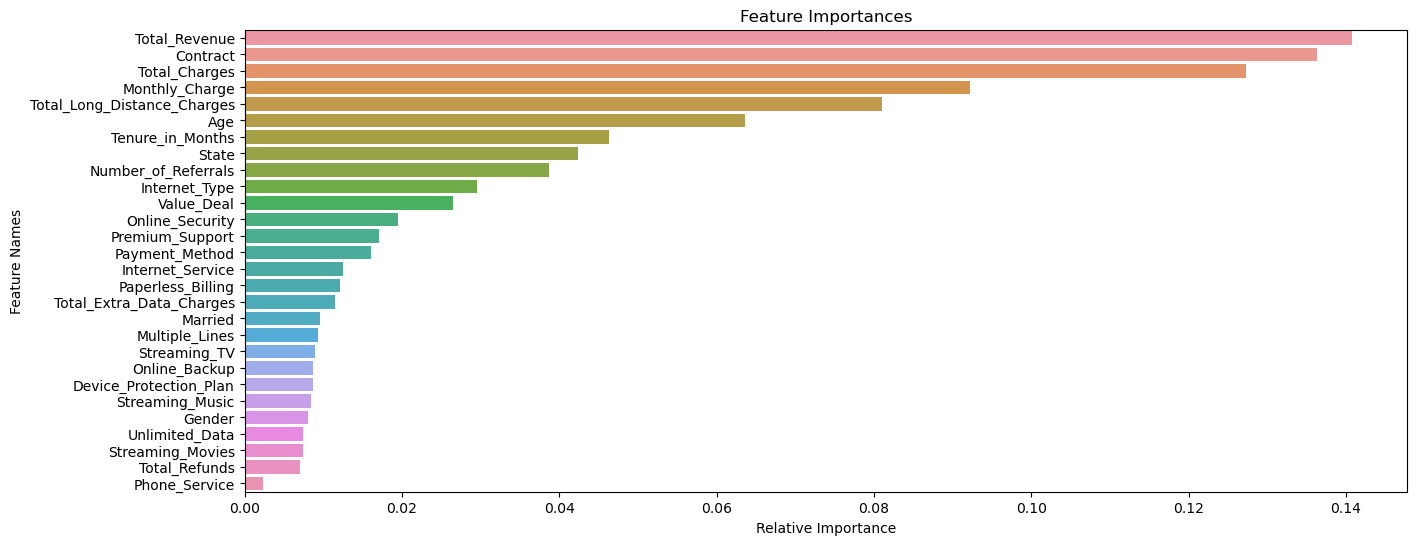

In [11]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [12]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\AHMAD\Desktop\Data Science Project\same\Production_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
 
# Save the results
original_data.to_csv(r"C:\Users\AHMAD\Desktop\Data Science Project\same\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married         State  Number_of_Referrals  \
0   11751-TAM  Female   18      No    Tamil Nadu                    5   
1   18415-KAR  Female   33     Yes     Karnataka                    7   
2   23148-CHH  Female   74     Yes  Chhattisgarh                    4   
3   23256-HAR  Female   32     Yes       Haryana                   10   
4   26902-TEL    Male   52     Yes     Telangana                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                36        NaN           Yes             No  ...   
2                 9     Deal 5           Yes             No  ...   
3                31     Deal 5           Yes             No  ...   
4                 2        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check          24.30         38.45           0.0   
1     Mailed Check    